In [43]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [44]:
# Définir la fonction pour trouver la somme entre min et max
def find_sum_between_min_max(arr):
    if len(arr) < 2:
        yield arr, [], [], 0, 0, -1, 0, 0
        return

    min_idx, max_idx = 0, 0
    somme_min_i, somme_max_i = arr[0], arr[0]
    for i in range(1, len(arr)):
        somme_min_i = min(somme_min_i, arr[i])
        somme_max_i = max(somme_max_i, arr[i])

        if arr[i] < arr[min_idx]:
            min_idx = i
        if arr[i] > arr[max_idx]:
            max_idx = i

        start, end = sorted([min_idx, max_idx])
        current_sum = sum(arr[start + 1:end])
        num_elements = max(0, end - start - 1)

        yield arr, [min_idx, max_idx], [], somme_min_i, somme_max_i, i, current_sum, num_elements

    yield arr, [min_idx, max_idx], list(range(start + 1, end)), somme_min_i, somme_max_i, -1, current_sum, num_elements

In [45]:
# Définir la fonction de mise à jour pour l'animation
def update(frame, bars, somme_min_i_text, somme_max_i_text, current_sum_text, num_elements_text):
    arr, highlighted_min_max, sum_range, somme_min_i, somme_max_i, current_idx, current_sum, num_elements = frame
    for i, bar in enumerate(bars):
        if i == current_idx:
            bar.set_color('cyan')
        elif i in highlighted_min_max:
            bar.set_color('red')
        elif i in sum_range:
            bar.set_color('green')
        else:
            bar.set_color('lightblue')
        bar.set_height(arr[i])

    somme_min_i_text.set_text(f"Min: {arr[min(highlighted_min_max)] if highlighted_min_max else 'N/A'}")
    somme_max_i_text.set_text(f"Max: {arr[max(highlighted_min_max)] if highlighted_min_max else 'N/A'}")
    current_sum_text.set_text(f"Somme courante: {current_sum}")
    num_elements_text.set_text(f"Éléments entre min et max: {num_elements}")

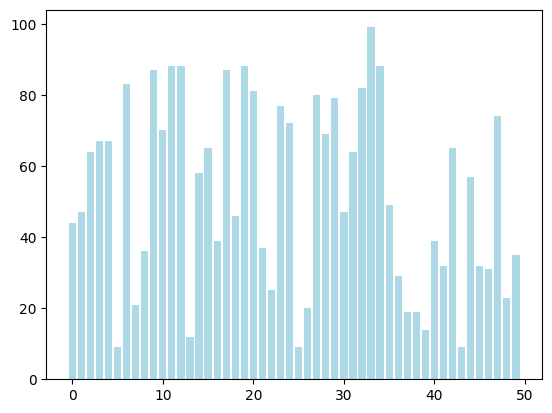

In [46]:
# Initialiser les données et configurer l'animation
np.random.seed(0)
arr = np.random.randint(0, 100, 50)
fig, ax = plt.subplots()
bars = plt.bar(range(len(arr)), arr, color='lightblue')
somme_min_i_text = ax.text(0.01, 0.95, "", transform=ax.transAxes)
somme_max_i_text = ax.text(0.01, 0.90, "", transform=ax.transAxes)
current_sum_text = ax.text(0.01, 0.85, "", transform=ax.transAxes)
num_elements_text = ax.text(0.01, 0.80, "", transform=ax.transAxes)

plt.show()

In [47]:
# Enregistrer l'animation en tant que fichier GIF
from matplotlib.animation import PillowWriter
ani = FuncAnimation(fig, func=update, frames=find_sum_between_min_max(arr),
                    fargs=(bars, somme_min_i_text, somme_max_i_text, current_sum_text, num_elements_text), blit=False,
                    repeat=False, cache_frame_data=False)

ani.save('sum_between_min_max_array.gif', writer=PillowWriter(fps=5))